In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
mush_data = pd.read_csv('https://stepik.org/media/attachments/course/4852/training_mush.csv')
mush_data

y = mush_data.pop('class').to_frame()
y

,class
0,0
1,1
2,1
3,0
4,0
...,...
6088,0
6089,1
6090,1
6091,0


In [3]:
rf = RandomForestClassifier(criterion='entropy', random_state=0)
search = GridSearchCV(rf, param_grid={'n_estimators': range(10, 51, 10),
                                     'max_depth': range(1, 13, 2),
                                     'min_samples_leaf': range(1,8),
                                     'min_samples_split': range(2, 10, 2)}, n_jobs=-1, cv=3)
search.fit(mush_data, y)
search.best_params_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


{'max_depth': 9,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 10}

In [4]:
# посмотрим на важность фичей
feature_importances_df = pd.DataFrame({'features':  list(mush_data), 'feature_importances': search.best_estimator_.feature_importances_})
feature_importances_df.sort_values('feature_importances', ascending=False)

,features,feature_importances
4,odor,0.226638
18,ring-type,0.089779
7,gill-size,0.083579
10,stalk-root,0.077297
8,gill-color,0.076431
3,bruises,0.063426
6,gill-spacing,0.060140
20,population,0.050244
21,habitat,0.046704
12,stalk-surface-below-ring,0.038955


In [5]:
mush_test = pd.read_csv('https://stepik.org/media/attachments/course/4852/testing_mush.csv')
mush_test

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,3,8,1,3,1,0,0,4,0,...,2,7,7,0,2,1,4,2,3,3
1,5,3,4,1,5,1,0,0,10,1,...,2,6,6,0,2,1,4,3,5,0
2,3,3,4,0,8,1,0,1,0,1,...,2,7,6,0,2,1,0,7,4,4
3,3,2,2,0,7,1,0,1,0,1,...,1,6,7,0,2,1,0,7,4,0
4,3,2,2,0,8,1,0,1,0,1,...,1,6,6,0,2,1,0,7,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2026,3,3,2,0,2,1,0,1,0,1,...,1,7,7,0,2,1,0,7,4,2
2027,5,2,8,1,0,1,0,0,10,0,...,2,7,7,0,2,1,4,2,2,1
2028,5,3,3,0,2,1,0,0,3,0,...,1,6,0,0,2,1,2,1,4,4
2029,5,3,3,1,5,1,0,0,9,1,...,2,3,3,0,2,1,4,3,4,0


In [6]:
list(search.best_estimator_.predict(mush_test)).count(1)

976

In [7]:
test_y_mush = pd.read_csv('testing_y_mush.csv')
test_y_mush

,class
0,0
1,0
2,1
3,1
4,1
...,...
2026,1
2027,0
2028,1
2029,0


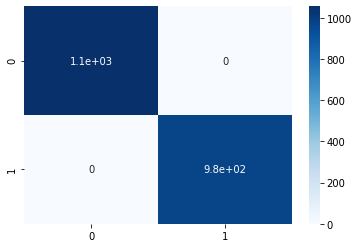

In [8]:
sns.heatmap(confusion_matrix(test_y_mush, search.best_estimator_.predict(mush_test)), annot=True, cmap="Blues")

# Следующий датасэт

In [9]:
invasion_data = pd.read_csv('https://stepik.org/media/attachments/course/4852/invasion.csv')

test_invasion_data = pd.read_csv('https://stepik.org/media/attachments/course/4852/operative_information.csv')

invasion_data

,class,g_reflection,i_reflection,speed,brightness,time_of_observance,volume
0,transport,2.190672,6.716633,62.168208,0.347465,158221,44.932446
1,transport,3.453276,8.995909,62.994707,0.590094,385972,41.568300
2,transport,2.432994,6.938691,62.245807,0.329288,446482,40.123467
3,fighter,6.083763,3.019459,18.474555,0.174738,210125,11.384865
4,fighter,12.876769,2.452950,195.805771,0.150446,23109,11.328806
...,...,...,...,...,...,...,...
495,fighter,9.901731,7.162124,58.095069,0.145065,395762,12.901909
496,transport,3.574132,7.118835,62.928159,0.469670,435926,39.926551
497,fighter,9.186049,4.580781,412.102112,0.108195,299594,12.178203
498,fighter,8.278256,8.353756,268.121561,0.132661,361911,13.905809


In [12]:
y_invasion_data = invasion_data.pop('class')
y_invasion_data = pd.DataFrame(y_invasion_data)

In [13]:
y_invasion_data = pd.Series(pd.factorize(y_invasion_data['class'])[0]) # по индексу 1 - какая цифра что означает

In [14]:
test_invasion_data

,g_reflection,i_reflection,speed,brightness,time_of_observance,volume
0,7.516543,3.916691,513.954279,0.177247,105908,13.267224
1,4.322988,6.967689,63.752970,0.545922,277855,39.833130
2,4.595724,9.098297,62.233948,0.389201,160662,42.014556
3,2.689675,7.964869,62.475495,0.541081,162092,42.056829
4,8.075576,5.169719,336.441261,0.174757,466853,11.779813
...,...,...,...,...,...,...
1495,11.755466,5.583147,325.069957,0.170644,388400,13.210917
1496,12.220137,4.023177,439.975574,0.163958,195305,13.819358
1497,1.611053,7.864930,65.025106,0.430021,307856,47.369083
1498,7.114131,5.532188,391.178342,0.150117,51590,12.447761


In [15]:
rf = RandomForestClassifier(criterion='entropy')
search = GridSearchCV(rf, param_grid={'n_estimators': range(10, 51, 10),
                                     'max_depth': range(1, 13, 2),
                                     'min_samples_leaf': range(1,8),
                                     'min_samples_split': range(2, 10, 2)}, n_jobs=-1, cv=3)
search.fit(invasion_data, y_invasion_data)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='entropy',
                                              max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
  

In [16]:
search.best_estimator_.predict(test_invasion_data)

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [17]:
from collections import Counter

In [18]:
Counter(search.best_estimator_.predict(test_invasion_data))

Counter({1: 675, 0: 595, 2: 230})

In [19]:
search.best_estimator_.feature_importances_

array([0.19043725, 0.05521088, 0.23830422, 0.18926269, 0.        ,
       0.32678496])

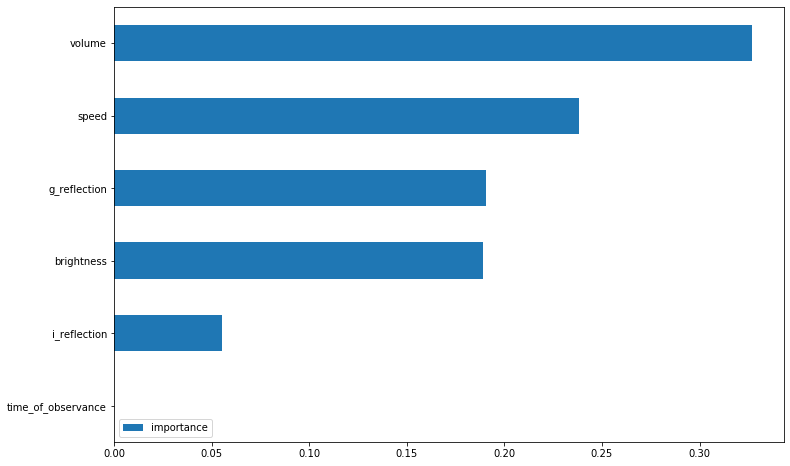

In [20]:
# Код для отрисовки важности фичей
imp = pd.DataFrame(search.best_estimator_.feature_importances_, index=invasion_data.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8))

In [21]:
space_data = pd.read_csv('https://stepik.org/media/attachments/course/4852/space_can_be_a_dangerous_place.csv')
space_data

,r,phi,peradventure_index,dustiness,black_hole_is_near,buggers_were_noticed,nearby_system_has_planemo,dangerous
0,169.1,138.0,22.3212,0.706285,0,1,1,1
1,11.1,148.0,1.4652,-0.410512,1,1,1,1
2,274.6,201.0,36.2472,0.756457,1,1,1,1
3,172.8,173.0,22.8096,0.035221,1,1,1,1
4,223.3,222.0,29.4756,0.197271,0,1,1,1
...,...,...,...,...,...,...,...,...
99995,301.7,249.0,39.8244,0.397064,0,1,1,1
99996,194.0,350.0,25.6080,-1.062202,0,1,1,1
99997,201.4,112.0,26.5848,1.571040,0,1,1,1
99998,7.8,115.0,1.0296,-1.206575,0,1,1,1


In [22]:
y = space_data.pop('dangerous')
y

0        1
1        1
2        1
3        1
4        1
        ..
99995    1
99996    1
99997    1
99998    1
99999    1
Name: dangerous, Length: 100000, dtype: int64

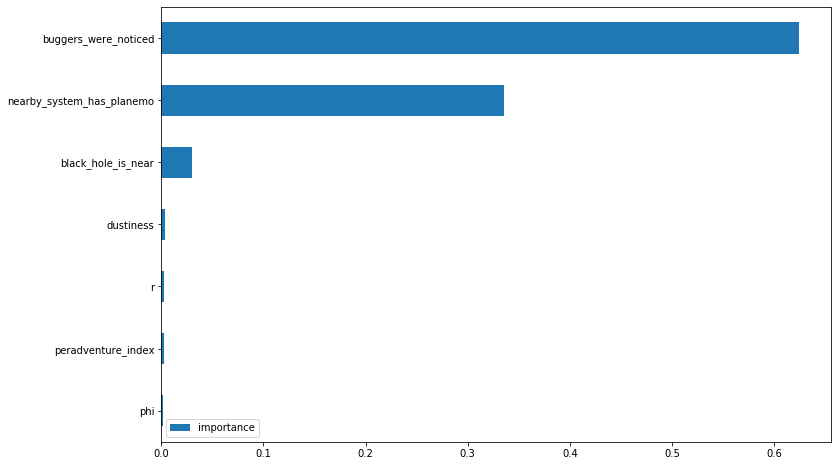

In [23]:
rf = RandomForestClassifier(criterion='entropy')
search = GridSearchCV(rf, param_grid={'n_estimators': [10, 15, 20],
                                     'max_depth': range(1, 13, 3),
                                     'min_samples_split': range(2, 10, 4)}, n_jobs=-1, cv=3)
search.fit(space_data, y)
# Код для отрисовки важности фичей
imp = pd.DataFrame(search.best_estimator_.feature_importances_, index=space_data.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8))

In [24]:
space_data = pd.read_csv('https://stepik.org/media/attachments/course/4852/space_can_be_a_dangerous_place.csv')
space_data.corr() # можно было не обучать модель а посмотреть корреляцию фичей в исходном датасэте.

,r,phi,peradventure_index,dustiness,black_hole_is_near,buggers_were_noticed,nearby_system_has_planemo,dangerous
r,1.000000,0.001023,1.000000,-0.003336,0.002337,0.001797,0.000326,0.005788
phi,0.001023,1.000000,0.001023,0.001921,0.002875,-0.004726,-0.000803,0.003035
peradventure_index,1.000000,0.001023,1.000000,-0.003336,0.002337,0.001797,0.000326,0.005788
dustiness,-0.003336,0.001921,-0.003336,1.000000,-0.004691,-0.001290,0.003370,-0.000499
black_hole_is_near,0.002337,0.002875,0.002337,-0.004691,1.000000,-0.001874,0.002661,0.052968
buggers_were_noticed,0.001797,-0.004726,0.001797,-0.001290,-0.001874,1.000000,-0.003031,0.344469
nearby_system_has_planemo,0.000326,-0.000803,0.000326,0.003370,0.002661,-0.003031,1.000000,0.299508
dangerous,0.005788,0.003035,0.005788,-0.000499,0.052968,0.344469,0.299508,1.000000
